In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [3]:
path = '..\\ML-Advertising_sales_prediction\\Advertising.csv'
dataset = pd.read_csv(path)
dataset.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Training model
## ***Problem Statement***
Build a model which predicts sales based on the money spent on different platforms for marketing.
## ***Performing Linear Regression***
Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$
-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>
---

## **Multiple Linear Regression**

### Data
Use the advertising dataset analyse the relationship between `TV advertising`, `Radio advertising`, `Newspaper advertising` and `Sales` using a multiple linear regression model. 

We'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

In case:

$Sales = c +  m_1 \times TV + m_2 \times Radio + m_3 \times Newspaper$  


## Splitting the dataset into the Training set and Test set

In [4]:
X = dataset.iloc[:,:3].values
y = dataset.iloc[:,3].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ( f' Percent of train data {len(X_train)/len(X)*100}%')

 Percent of train data 75.0%


## Training the Multiple Linear Regression model on the Training set

In [5]:
from sklearn.linear_model import LinearRegression
model_MulLR = LinearRegression()
model_MulLR.fit(X_train, y_train)

LinearRegression()

## Visualising the Training set results

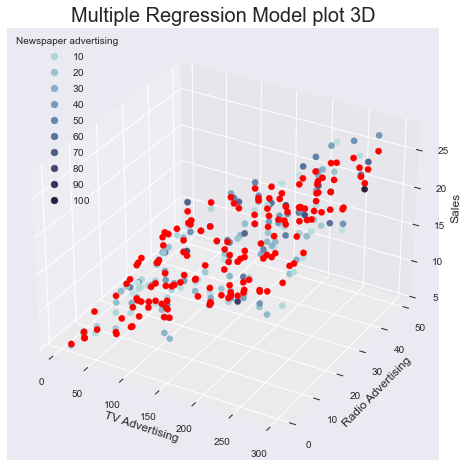

In [6]:
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(6,6))
ax = mplot3d.Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sns.color_palette("ch:start=.2,rot=-.3", 150).as_hex())
sc = ax.scatter3D(X_train[:,0], X_train[:,1], y_train, s=40, alpha=1, c = X_train[:,2], cmap = cmap)
ax.scatter3D(X_train[:,0], X_train[:,1], model_MulLR.predict(X_train), s=40, alpha=1, color = "red")
ax.set_zlim(5,)
ax.set_title('Multiple Regression Model plot 3D',size = 20)
ax.set_xlabel('TV Advertising',fontsize = 12)
ax.set_ylabel('Radio Advertising',fontsize = 12)
ax.set_zlabel('Sales',fontsize = 12)
plt.legend(*sc.legend_elements(), title = "Newspaper advertising");

In [7]:
print(f"c : {model_MulLR.intercept_}")
print(f"m1 : {model_MulLR.coef_[0]}")
print(f"m2 : {model_MulLR.coef_[1]}")
print(f"m3 : {model_MulLR.coef_[2]}")

c : 4.728630893324768
m1 : 0.05345308057871199
m2 : 0.11041756333934197
m3 : -4.3712513499957085e-05


The final linear regression equation:
$Sales = 4.73 +  0.05 \times TV + 0.11 \times Radio - 4.37 \times Newspaper$  

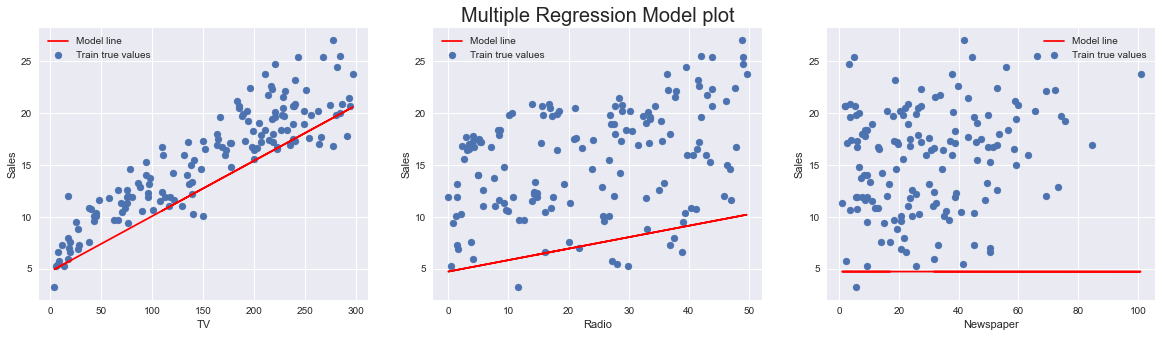

In [8]:
fig,((ax1,ax2,ax3)) = plt.subplots(figsize=(20,5),nrows=1,ncols=3)
ax2.set_title('Multiple Regression Model plot',size = 20)

ax1.scatter(X_train[:,0], y_train)
ax1.plot(X_train[:,0], (model_MulLR.intercept_ + model_MulLR.coef_[0] * X_train[:,0]) ,color = 'red')
ax1.legend(['Model line','Train true values'])
ax1.set_xlabel('TV')
ax1.set_ylabel('Sales')

ax2.scatter(X_train[:,1], y_train)
ax2.plot(X_train[:,1], (model_MulLR.intercept_ + model_MulLR.coef_[1] * X_train[:,1]) ,color = 'red')
ax2.legend(['Model line','Train true values'])
ax2.set_xlabel('Radio')
ax2.set_ylabel('Sales')

ax3.scatter(X_train[:,2], y_train)
ax3.plot(X_train[:,2], (model_MulLR.intercept_ + model_MulLR.coef_[2] * X_train[:,2]) ,color = 'red')
ax3.legend(['Model line','Train true values'])
ax3.set_xlabel('Newspaper')
ax3.set_ylabel('Sales');

## SAVE MODEL

In [9]:
result = model_MulLR.score(X_train, y_train)
result

0.9119295792061695

In [10]:
import joblib
joblib.dump(model_MulLR,'Sales_multiple_Model.sav')

['Sales_multiple_Model.sav']